<a href="https://colab.research.google.com/github/elizamelo/Analise-Dados-FAE/blob/main/2024_01/RooFit/ROOTnoColab_Aula04Data2024_01_Exemplos8And9a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#https://colab.research.google.com/drive/1XlUrz2_dcKnsbHfTUvY8a8RATATr9XBX#scrollTo=0sRCsFc7JClS
!wget https://github.com/MohamedElashri/ROOT/releases/download/ubuntu/root_v6.28.04_Ubuntu_20.04.zip
!unzip /content/root_v6.28.04_Ubuntu_20.04.zip
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion
!apt-get inatall libpython3.6-dev
!rm -f root_v6.28.04_Ubuntu_20.04.zip

Streaming output truncated to the last 5000 lines.
  inflating: root_build/tutorials/gui/calendar.C  
  inflating: root_build/tutorials/gui/mditest.C  
  inflating: root_build/tutorials/gui/Slider3Demo.C  
  inflating: root_build/tutorials/gui/mditestbg.xpm  
  inflating: root_build/tutorials/gui/textEntries.C  
  inflating: root_build/tutorials/gui/ntupleTableTest.C  
  inflating: root_build/tutorials/gui/customContextMenu.C  
  inflating: root_build/tutorials/gui/splitterHorizontal.C  
  inflating: root_build/tutorials/gui/guiWithCINT.C  
  inflating: root_build/tutorials/gui/CPUMeter.C  
  inflating: root_build/tutorials/gui/numberEntry.C  
  inflating: root_build/tutorials/gui/splitbuttonTest.C  
  inflating: root_build/tutorials/gui/buttonTest.C  
  inflating: root_build/tutorials/gui/simpleTableTest.C  
  inflating: root_build/tutorials/gui/drag_and_drop.C  
  inflating: root_build/tutorials/gui/textviewostream.C  
  inflating: root_build/tutorials/gui/listBox.C  
  inflating: ro

In [2]:
!wget http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2_amd64.deb
!sudo dpkg -i libssl1.1_1.1.1f-1ubuntu2_amd64.deb
!rm -f libssl1.1_1.1.1f-1ubuntu2_amd64.deb

--2024-04-08 23:12:51--  http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2_amd64.deb
Resolving archive.ubuntu.com (archive.ubuntu.com)... 91.189.91.83, 185.125.190.39, 91.189.91.82, ...
Connecting to archive.ubuntu.com (archive.ubuntu.com)|91.189.91.83|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1318204 (1.3M) [application/vnd.debian.binary-package]
Saving to: ‘libssl1.1_1.1.1f-1ubuntu2_amd64.deb’

libssl1.1_1.1.1f-1u 100%[===================>]   1.26M  --.-KB/s    in 0.09s   

2024-04-08 23:12:51 (14.4 MB/s) - ‘libssl1.1_1.1.1f-1ubuntu2_amd64.deb’ saved [1318204/1318204]

Selecting previously unselected package libssl1.1:amd64.
(Reading database ... 121903 files and directories currently installed.)
Preparing to unpack libssl1.1_1.1.1f-1ubuntu2_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2) ...
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-l

In [3]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")
import ctypes
ctypes.cdll.LoadLibrary('/content/root_build/lib//libCore.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib//libThread.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib//libTreePlayer.so')

<CDLL '/content/root_build/lib//libTreePlayer.so', handle 55d8b17251f0 at 0x7f4216662d10>

In [4]:
#Block to import all the ROOT functions that we will be using throughout this template
# Importamos as classes necessárias
from ROOT import TFile
from ROOT import TLorentzVector
from ROOT import TH1F
from ROOT import TF1
import numpy as np
from ROOT import RooRealVar, RooGenericPdf, RooWorkspace
from ROOT import RooDataHist, RooCategory, RooPolynomial, RooAddPdf
from ROOT import RooDataSet
from ROOT import RooExponential
from ROOT import RooGaussian
from ROOT import RooVoigtian
from ROOT import RooArgList
from ROOT import RooArgSet
from ROOT import RooAddPdf
from ROOT import RooPlot
from ROOT import TLegend
from ROOT import RooFit
from ROOT import TLatex
from ROOT import RooChi2Var
from ROOT import TStyle
from ROOT import TCanvas, TFile, TPaveText, TH1F, TLegend, TTree
from ROOT import gStyle, TGraphErrors, TF1, TGraph, gPad, gRandom, gROOT
from ROOT import kRed, kBlue
from ROOT import TFitResultPtr, TMatrixD
from ROOT import RooRealVar, RooChebychev, kDashed, kYellow



Welcome to JupyROOT 6.28/04


**Exemplo 08:**  Somando modelos
Ref.: https://github.com/Analise-Dados-FAE/2021/blob/main/aula6_RooFit/exemploAddPdf.ipynb


Cria um modelo composto por uma distribuição Gaussiana e uma função linear, gera dados aleatórios com base nesse modelo e, em seguida, plota os dados e o modelo no mesmo gráfico.





[#0] WARNING:InputArguments -- The parameter 'sigma' with range [0, 0.3] of the RooGaussian 'gaus' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (linear)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()


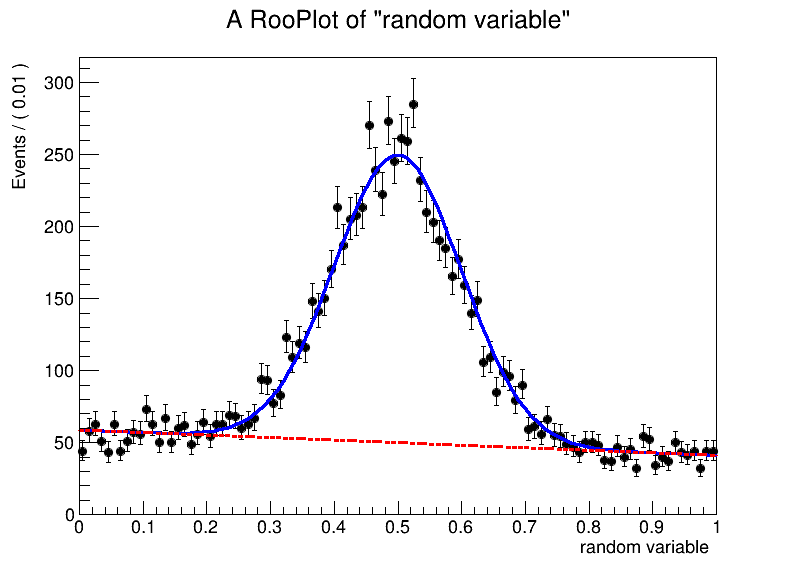

In [5]:
# Observable
x = RooRealVar("x", "random variable", 0.0, 1.0)

# Gaussian model
mu = RooRealVar("mu", "mean parameter", 0.5, 0.0, 1.0)
sigma = RooRealVar("sigma", "width parameter", 0.1, 0.0, 0.3)
gaus = RooGaussian("gaus", "Gaussian PDF", x, mu, sigma)

# Linear function: 1 + slope*x
slope = RooRealVar("slope", "slope parameter", -0.3, -10., 10.)
linear = RooPolynomial("linear", "Linear function", x, RooArgList(slope))

# Add up: Gaussian + linear
fraction = RooRealVar("fraction", "fraction of Gaussian", 0.5, 0., 1.)
model = RooAddPdf("model", "PDF model", RooArgList(gaus, linear), RooArgList(fraction))

# Generate random data, plot
data = model.generate(x, 10000)
frame = x.frame()
data.plotOn(frame)
model.plotOn(frame)
model.plotOn(frame, RooFit.Components(linear), RooFit.LineStyle(7), RooFit.LineColor(kRed))

canvas = TCanvas("c1", "c1", 800, 600)
frame.Draw()
canvas.Draw()


**Exemplo 09 a:** Somando modelos

Ref.: https://www.nikhef.nl/~verkerke/ferrara/ex3a.C

Este código cria um modelo composto por uma distribuição Gaussiana e um modelo de Chebychev de fundo, gera dados aleatórios com base nesse modelo e ajusta o modelo aos dados. Em seguida, plota os dados e o modelo no mesmo gráfico, incluindo a visualização dos erros no ajuste. Por fim, os dados são importados para o espaço de trabalho e o espaço de trabalho é salvo em um arquivo chamado "model.root".

In [6]:

# Crie um espaço de trabalho
w = RooWorkspace("w", True)

# Defina a variável observável 'x' e seus limites
x = RooRealVar("x", "x", -10, 10)

# Crie um modelo gaussiano com parâmetros 'mean' e 'sigma'
mean = RooRealVar("mean", "mean", -10, 10)
sigma = RooRealVar("sigma", "sigma", 3, 0.1, 10)
gauss = RooGaussian("g", "Gaussian PDF", x, mean, sigma)

# Crie um modelo de Chebychev de fundo com parâmetros 'a0' e 'a1'
a0 = RooRealVar("a0", "a0", 0, -1, 1)
a1 = RooRealVar("a1", "a1", 0.1, -1, 1)
bkg = RooChebychev("bkg", "Background Chebychev", x, RooArgList(a0, a1))

# Crie um modelo somado com frações 'Nsig' e 'Nbkg' para o sinal e fundo
Nsig = RooRealVar("Nsig", "Nsig", 0, 10000)
Nbkg = RooRealVar("Nbkg", "Nbkg", 0, 10000)
model = RooAddPdf("model", "Signal + Background", RooArgList(gauss, bkg), RooArgList(Nsig, Nbkg))

# Gere dados aleatórios com base no modelo
data = model.generate(x, 1000)

# Realize um ajuste ao modelo aos dados
model.fitTo(data)

# Crie um quadro (plot) para visualização
frame = x.frame()
data.plotOn(frame)
model.plotOn(frame)
model.plotOn(frame, RooFit.Components("bkg"), RooFit.LineStyle(kDashed))

# Visualize os erros no ajuste
result = model.fitTo(data, RooFit.Save())
model.plotOn(frame, RooFit.VisualizeError(result), RooFit.MoveToBack())
model.plotOn(frame, RooFit.VisualizeError(result), RooFit.Components("bkg"), RooFit.MoveToBack(), RooFit.FillColor(kYellow))

# Desenhe o quadro final
frame.Draw()


# Importe os dados para o espaço de trabalho e salve o espaço de trabalho em um arquivo
getattr(w, "import")(data, RooFit.Rename("data"))
w.writeToFile("model.root")

False

[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (g,bkg)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 Nbkg         5.00000e+03  1.00000e+03    0.00000e+00  1.00000e+04
     2 Nsig         5.00000e+03  1.00000e+03    0.00000e+00  1.00000e+04
     3 a0           0.00000e+00  2.00000e-01   -1.00000e+00  1.00000e+00
     4 a1           1.00000e-01  2.00000e-01   -1.00000e+00  1.00000e+00
     5 mean         0.00000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
     6 sigma        3.00000e+00  9.90000e-01    1.00000e-01  1.00000e+01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **   

**bold text**


